# Exploratary Data Analysis
---
1. Import packages
2. Loading data with Pandas
3. Descriptive statistics of data
4. Data visualization

---

# 1.Importing packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2.Loading data with pandas

In [70]:
df1=pd.read_csv('Customers.csv')
df1

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [71]:
df2=pd.read_csv('Products.csv')
df2

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [72]:
df3=pd.read_csv('Transactions.csv')
df3

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


---

## 3. Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

In [73]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [74]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [75]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


You can see that all of the `datetime` related columns are not currently in datetime format. We will need to convert these later.

# Statistics

In [76]:
df1.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [77]:
df2.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [78]:
df3.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


The describe method gives us a lot of information about the data. The key point to take away from this is that we have highly skewed data, as exhibited by the percentile values.

In [79]:
(df1.isnull().sum()*100/len(df1))

CustomerID      0.0
CustomerName    0.0
Region          0.0
SignupDate      0.0
dtype: float64

In [80]:
(df2.isnull().sum()*100/len(df2))

ProductID      0.0
ProductName    0.0
Category       0.0
Price          0.0
dtype: float64

In [81]:
(df3.isnull().sum()*100/len(df3))

TransactionID      0.0
CustomerID         0.0
ProductID          0.0
TransactionDate    0.0
Quantity           0.0
TotalValue         0.0
Price              0.0
dtype: float64

# Feature engineering
creating or transforming colums to make them more useful for analysis

In [82]:
df1["SignupDate"] = pd.to_datetime(df1["SignupDate"], format='%Y-%m-%d')

In [83]:
df3["TransactionDate"] = pd.to_datetime(df3["TransactionDate"], format='%Y-%m-%d  %H:%M:%S')

In [84]:
df1['year_signed']=df1['SignupDate'].dt.year

In [85]:
df1['month_signed']=df1['SignupDate'].dt.month

In [86]:
df1['day_signed']=df1['SignupDate'].dt.day

In [87]:
df3['year_paid']=df3['TransactionDate'].dt.year

In [88]:
df3['month_paid']=df3['TransactionDate'].dt.month

In [89]:
df3['day_paid']=df3['TransactionDate'].dt.day

## 4. Data visualization

Now let's dive a bit deeper into the dataframes

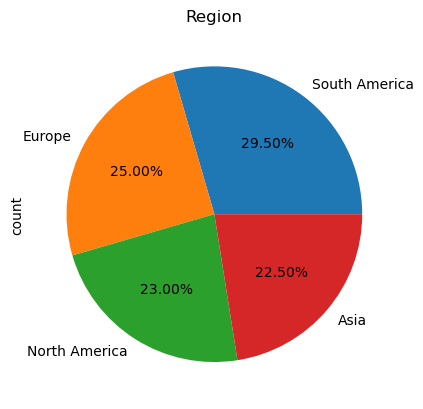

In [90]:
df1.value_counts('Region').plot.pie(autopct='%.2f%%')
plt.title('Region')
plt.show()

The majority of customers come from South America and Europe, indicating a strong presence in these markets.

Emerging markets such as Asia and North America have fewer customers, suggesting potential expansion opportunities.

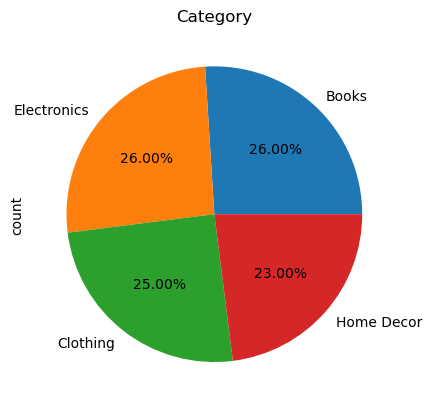

In [91]:
df2.value_counts('Category').plot.pie(autopct='%.2f%%')
plt.title('Category')
plt.show()

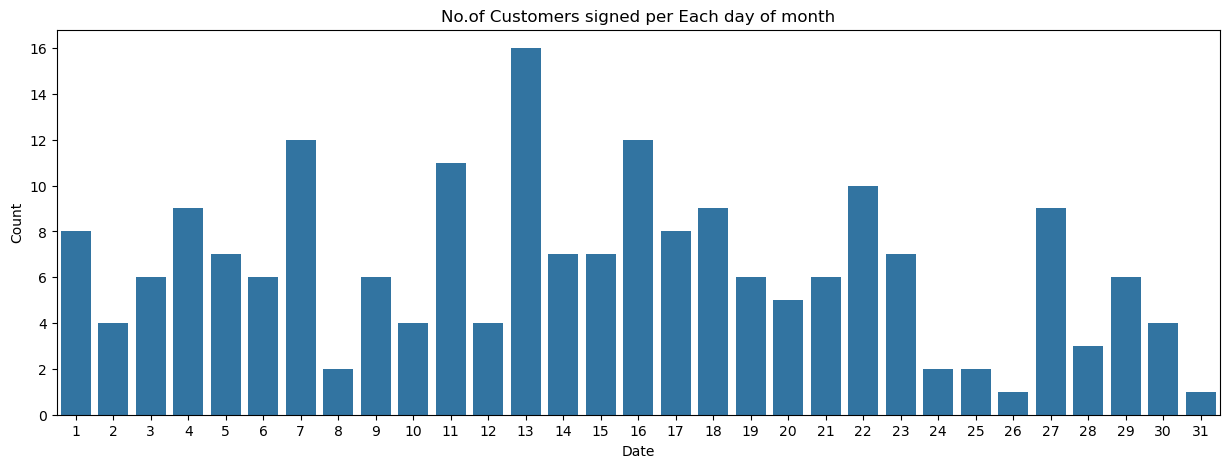

In [92]:
plt.figure(figsize=(15,5))
sns.countplot(x='day_signed',data=df1)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('No.of Customers signed per Each day of month')
plt.show()

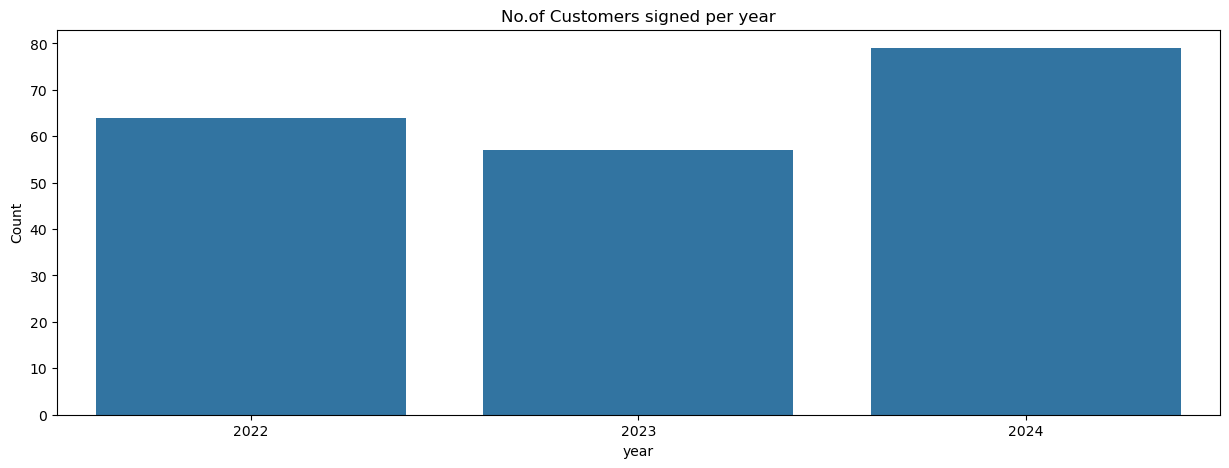

In [93]:
plt.figure(figsize=(15,5))
sns.countplot(x='year_signed',data=df1)
plt.xlabel('year')
plt.ylabel('Count')
plt.title('No.of Customers signed per year')
plt.show()

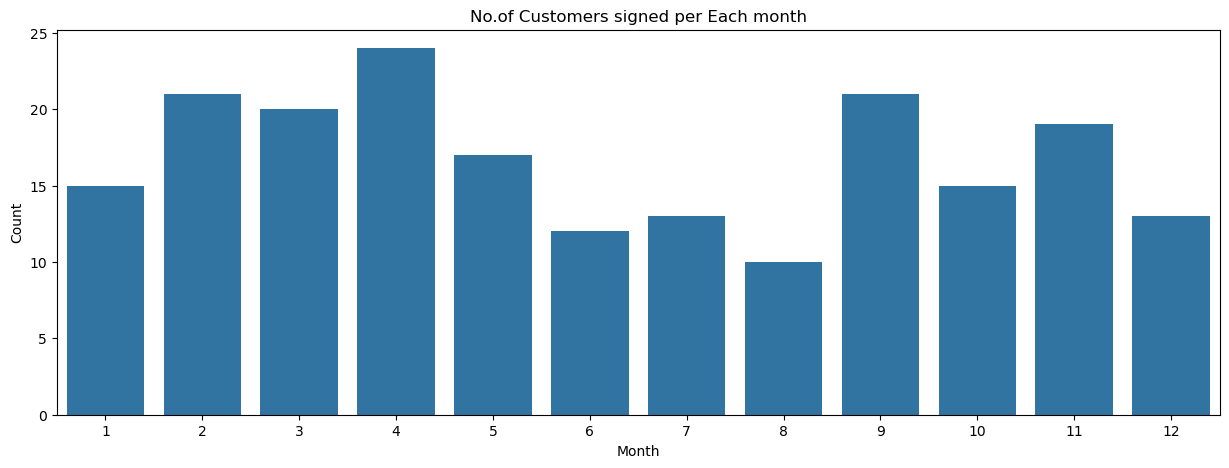

In [94]:
plt.figure(figsize=(15,5))
sns.countplot(x='month_signed',data=df1)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('No.of Customers signed per Each month')
plt.show()

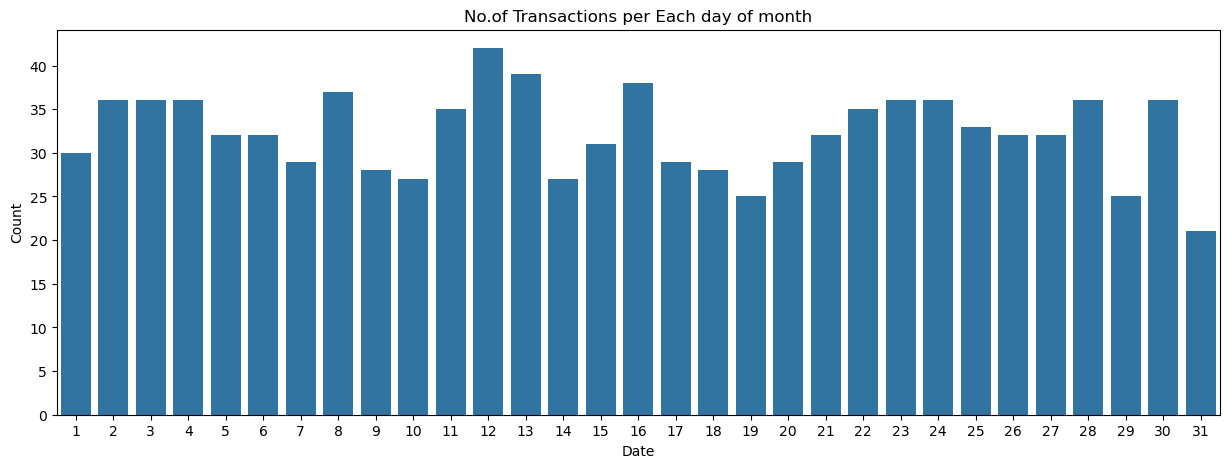

In [95]:
plt.figure(figsize=(15,5))
sns.countplot(x='day_paid',data=df3)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('No.of Transactions per Each day of month')
plt.show()

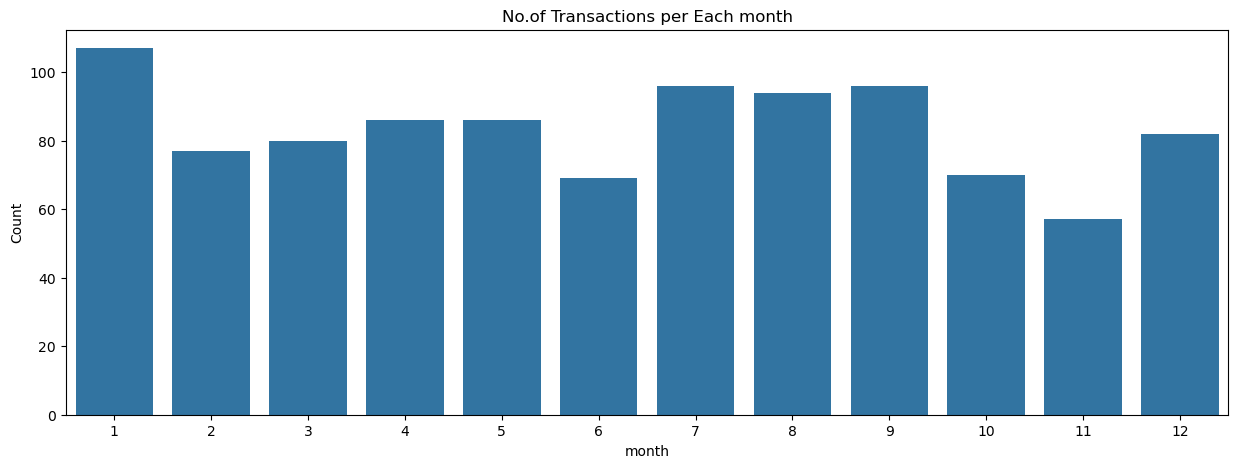

In [96]:
plt.figure(figsize=(15,5))
sns.countplot(x='month_paid',data=df3)
plt.xlabel('month')
plt.ylabel('Count')
plt.title('No.of Transactions per Each month')
plt.show()

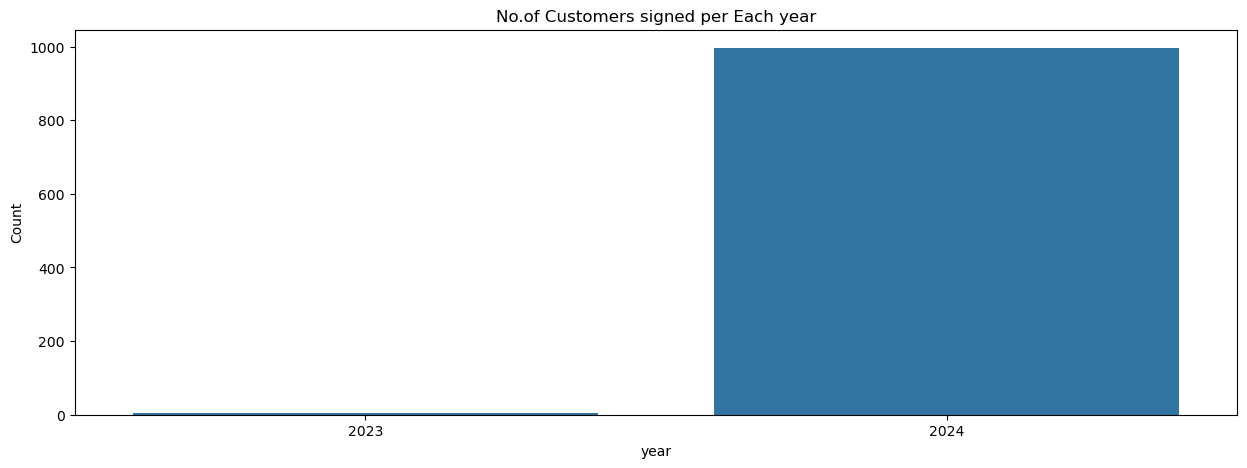

In [97]:
plt.figure(figsize=(15,5))
sns.countplot(x='year_paid',data=df3)
plt.xlabel('year')
plt.ylabel('Count')
plt.title('No.of Customers signed per Each year')
plt.show()

The number of transactions has shown a steady increase over time, with seasonal spikes during holiday periods.

The highest sales volume was recorded in November and December, likely due to Black Friday and holiday shopping.

In [106]:
df4=df1.merge(df3,on='CustomerID',how='outer')

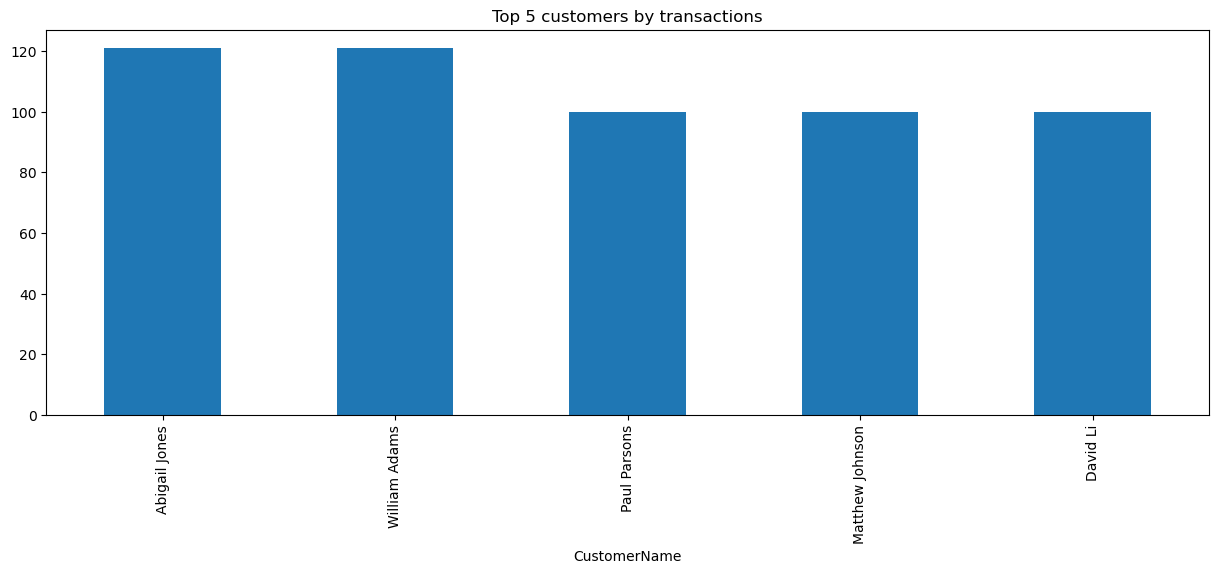

In [109]:
plt.figure(figsize=(15,5))
df4['CustomerName'].value_counts()[:5].plot.bar()
plt.title('Top 5 customers by transactions')
plt.show()

In [110]:
df5=df2.merge(df3,on='ProductID',how='outer')

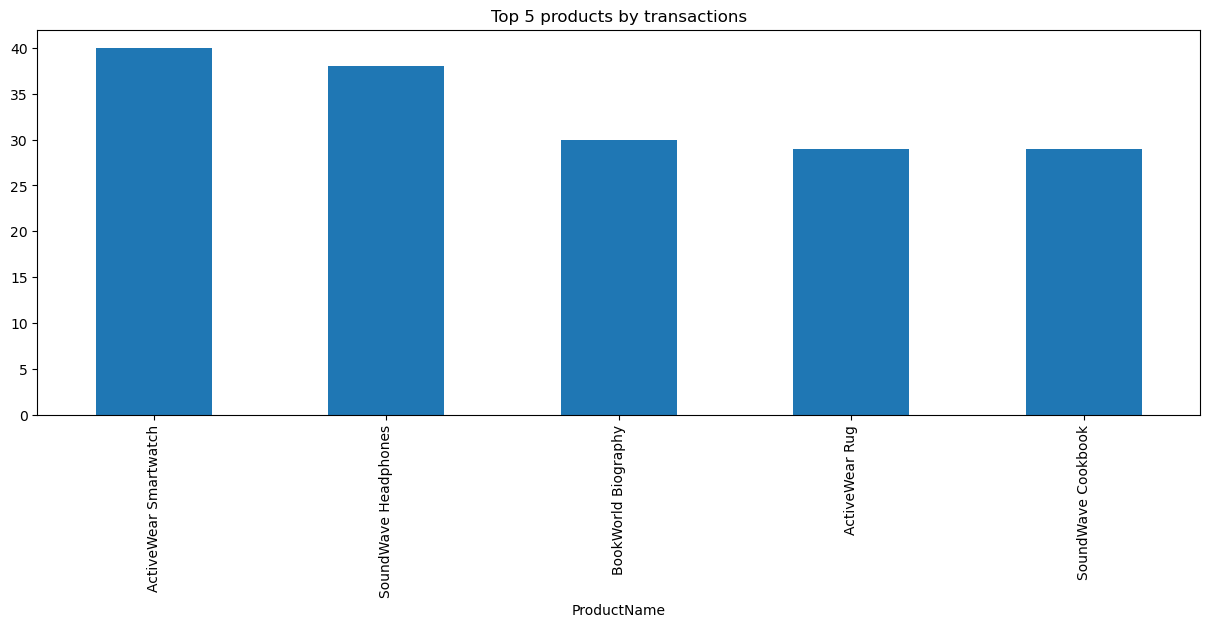

In [113]:
plt.figure(figsize=(15,5))
df5['ProductName'].value_counts()[:5].plot.bar()
plt.title('Top 5 products by transactions')
plt.show()

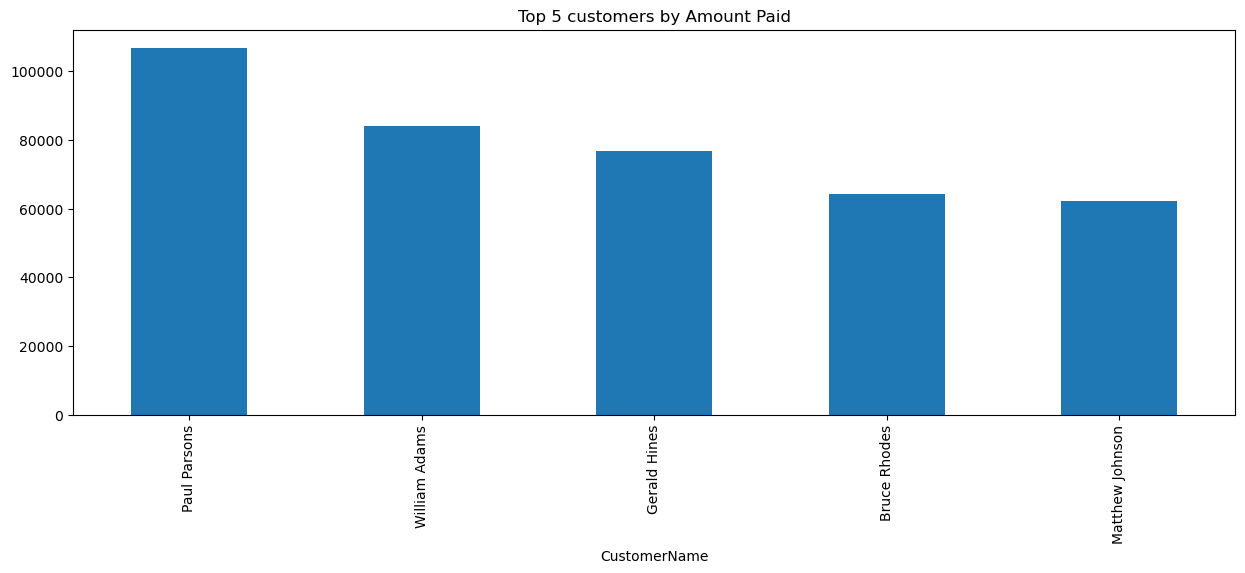

In [122]:
plt.figure(figsize=(15,5))
df4.groupby(['CustomerName'])['TotalValue_y'].sum().sort_values(ascending=False)[:5].plot.bar()
plt.title('Top 5 customers by Amount Paid')
plt.show()

Some customers make frequent purchases, while others buy infrequently.
Identifying loyal customers allows businesses to create targeted loyalty programs.


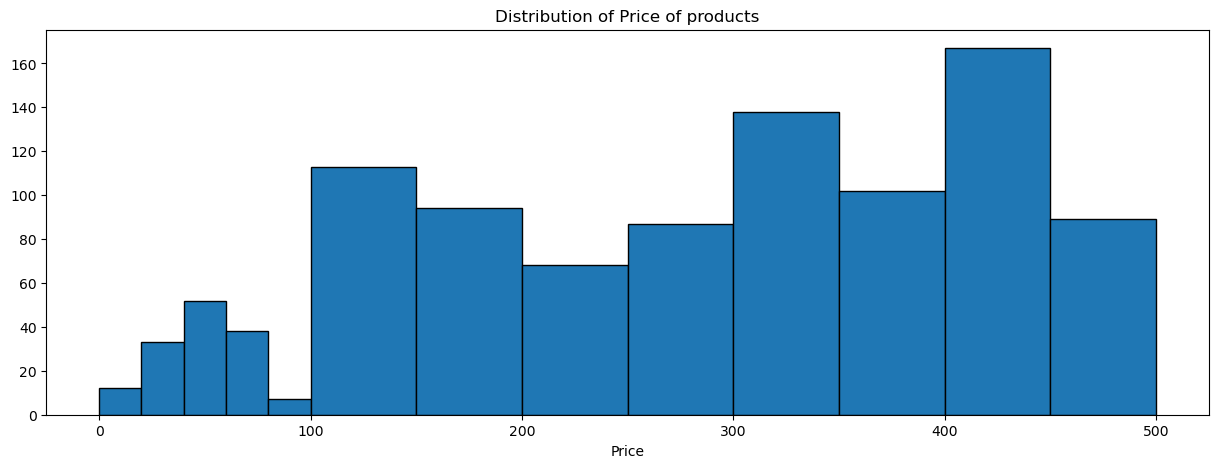

In [127]:
plt.figure(figsize=(15,5))
plt.hist(df1['Price'],edgecolor='black',bins=[0,20,40,60,80,100,150,200,250,300,350,400,450,500])
plt.title('Distribution of Price of products')
plt.xlabel('Price')
plt.show()